In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pre_pandemic_df = pd.read_csv('/Users/lijiazheng/Desktop/project jobs/pre_pandemic.csv')
post_pandemic_df = pd.read_csv('/Users/lijiazheng/Desktop/project jobs/post_pandemic.csv')

In [29]:
pre_pandemic_df['Remote'].value_counts()

Remote
0    15049
1     1191
Name: count, dtype: int64

In [4]:
X = pre_pandemic_df.drop('Remote', axis=1)
y = pre_pandemic_df['Remote']

In [6]:
minority_df = pre_pandemic_df[pre_pandemic_df['Remote'] == 1]
majority_df = pre_pandemic_df[pre_pandemic_df['Remote'] == 0]

# Downsample majority class
majority_downsampled_df = majority_df.sample(n=len(minority_df), random_state=42)

# Combine minority class with downsampled majority class
balanced_df = pd.concat([minority_df, majority_downsampled_df])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define new X and y using the balanced dataset
X_balanced = balanced_df.drop('Remote', axis=1)
y_balanced = balanced_df['Remote']

# Split the balanced dataset
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

In [ ]:
# Initialize and train a new model on the balanced dataset
clf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = clf_balanced.predict(X_test_balanced)

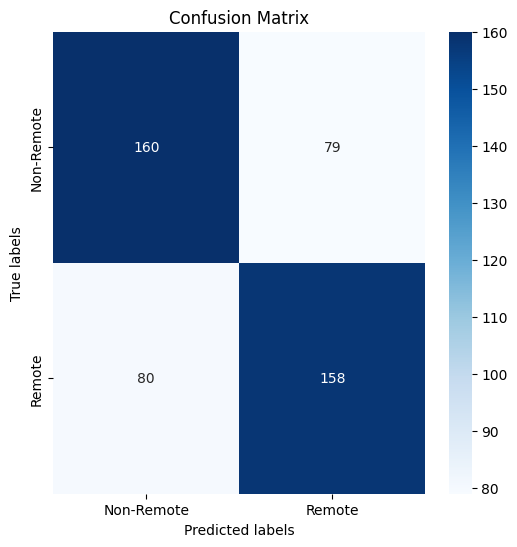

In [33]:
conf_matrix = confusion_matrix(y_test_balanced, y_pred_balanced)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Remote', 'Remote'])
ax.yaxis.set_ticklabels(['Non-Remote', 'Remote'])

plt.show()

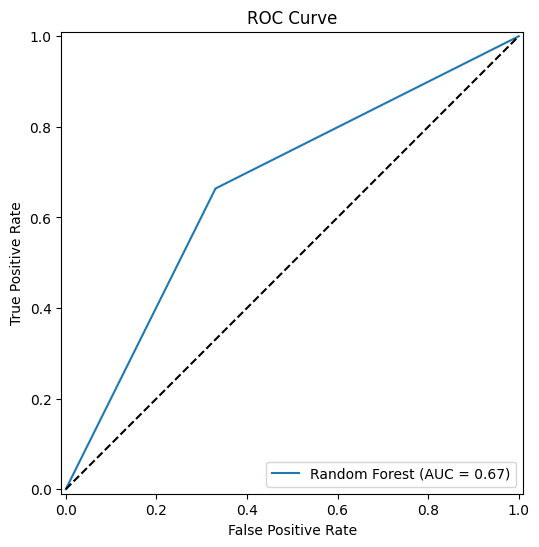

In [34]:
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_balanced)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot(ax=ax)
ax.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

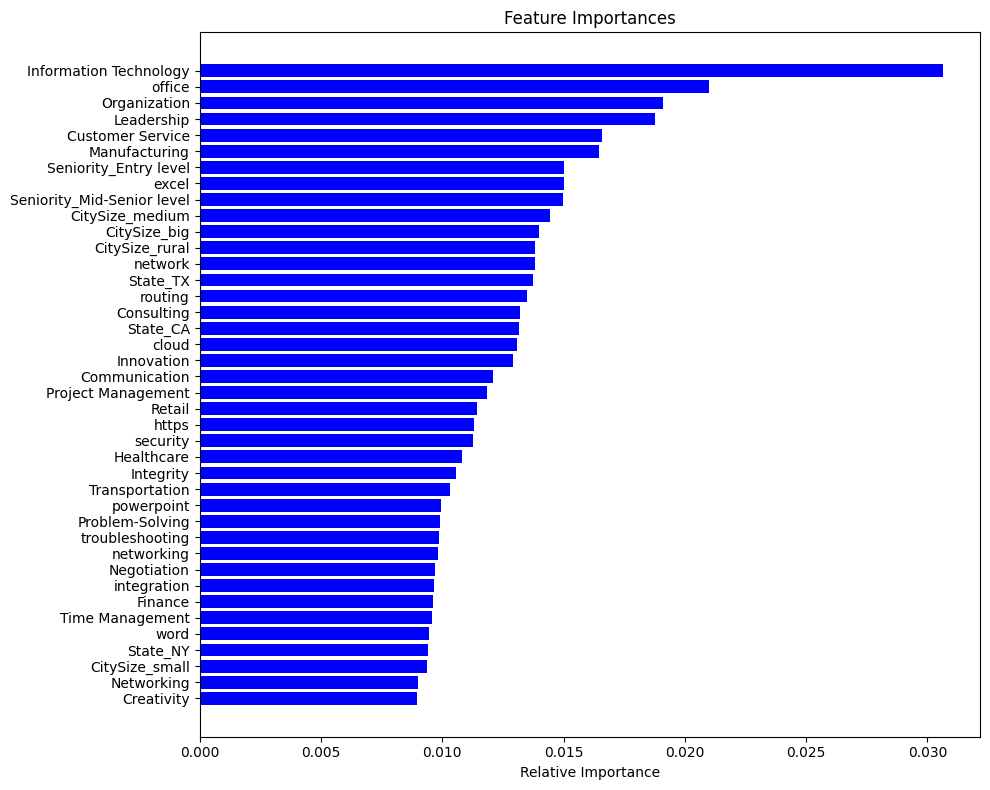

In [35]:
# Assuming 'clf' is your trained classifier and 'X' is your feature matrix
features = X.columns
importances = clf_balanced.feature_importances_
indices = np.argsort(importances)[-40:]  # Modify this to select top N features

plt.figure(figsize=(10, 8))  # Increase figure size
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], rotation='horizontal')  # Rotate feature names
plt.xlabel('Relative Importance')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [4]:
industries = [
    'Environment and Agriculture', 'Communication', 'Consulting', 'Education', 'Energy', 
    'Entertainment', 'Finance', 'Government Administration', 'Healthcare', 
    'Hospitality', 'Human Resource', 'Information Technology', 'Legal Services', 
    'Manufacturing', 'Real Estate', 'Retail', 'Social Service', 'Transportation'
]

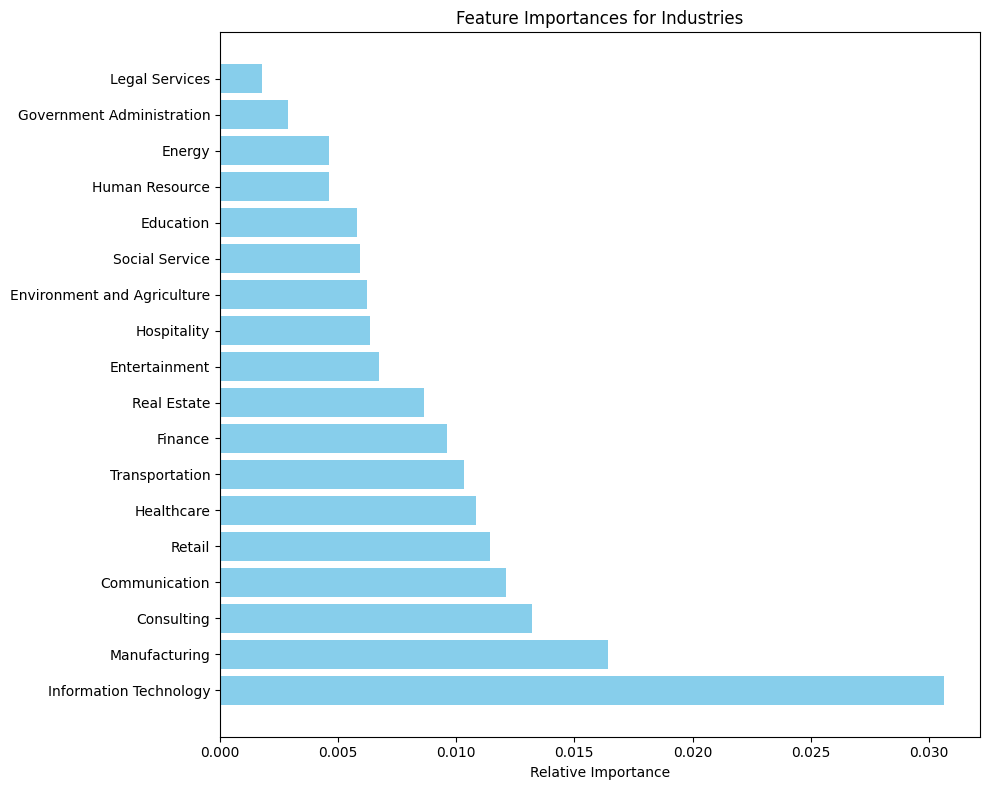

In [36]:
importances = clf_balanced.feature_importances_

# Map feature names to their importances
feature_importance_dict = dict(zip(X.columns, importances))

# Filter out the importances for the industries
industry_importances = {feature: importance for feature, importance in feature_importance_dict.items() if feature in industries}

# Sort industries by their importance
sorted_industries = sorted(industry_importances.items(), key=lambda item: item[1], reverse=True)

# Unzip the feature names and their corresponding importances
sorted_feature_names, sorted_importances = zip(*sorted_industries)

# Plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances for Industries')
plt.barh(range(len(sorted_importances)), sorted_importances, color='skyblue', align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


In [62]:
minority_df = post_pandemic_df[post_pandemic_df['Remote'] == 1]
majority_df = post_pandemic_df[post_pandemic_df['Remote'] == 0]

# Downsample majority class
majority_downsampled_df = majority_df.sample(n=len(minority_df), random_state=42)

# Combine minority class with downsampled majority class
balanced_df = pd.concat([minority_df, majority_downsampled_df])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define new X and y using the balanced dataset
X_balanced = balanced_df.drop('Remote', axis=1)
y_balanced = balanced_df['Remote']

# Split the balanced dataset
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

In [ ]:
# Initialize and train a new model on the balanced dataset
clf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = clf_balanced.predict(X_test_balanced)

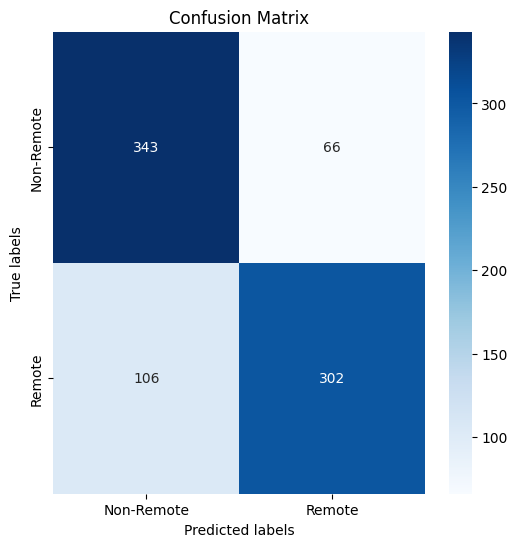

In [41]:
conf_matrix = confusion_matrix(y_test_balanced, y_pred_balanced)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Remote', 'Remote'])
ax.yaxis.set_ticklabels(['Non-Remote', 'Remote'])

plt.show()

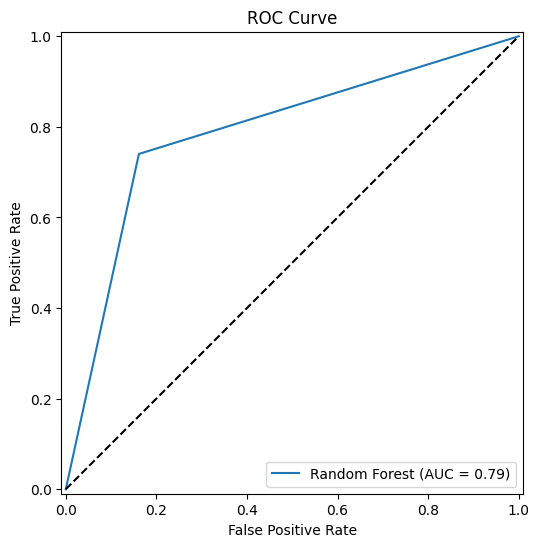

In [42]:
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_balanced)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot(ax=ax)
ax.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

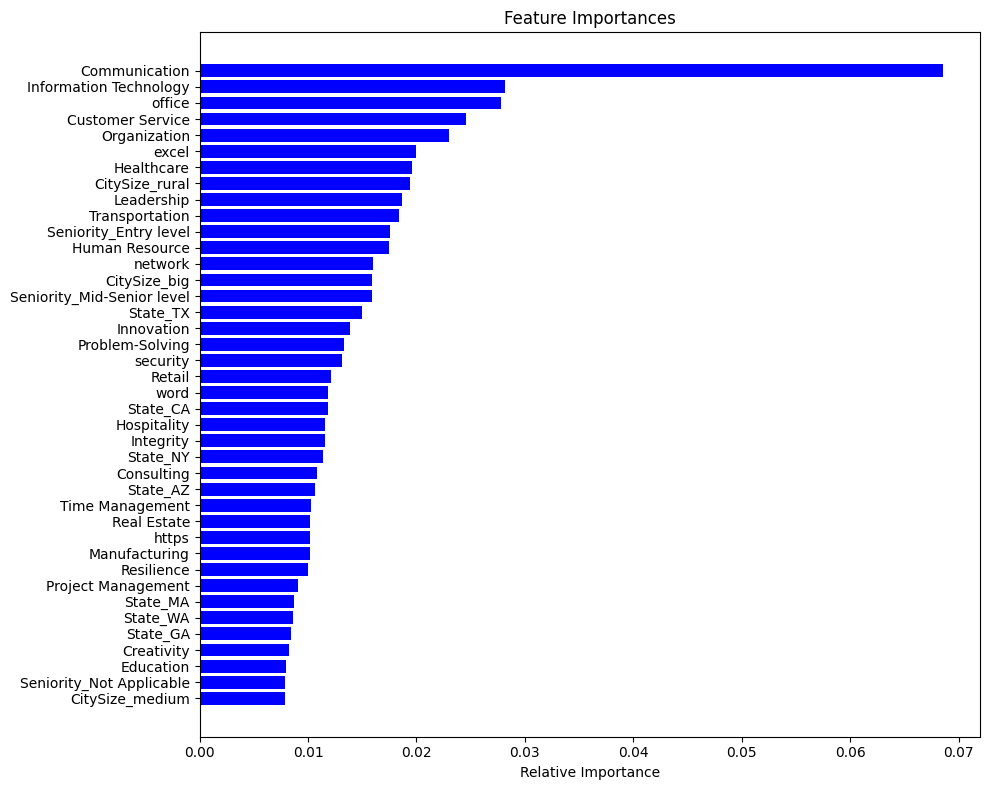

In [43]:
features = X.columns
importances = clf_balanced.feature_importances_
indices = np.argsort(importances)[-40:]  # Modify this to select top N features

plt.figure(figsize=(10, 8))  # Increase figure size
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], rotation='horizontal')  # Rotate feature names
plt.xlabel('Relative Importance')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

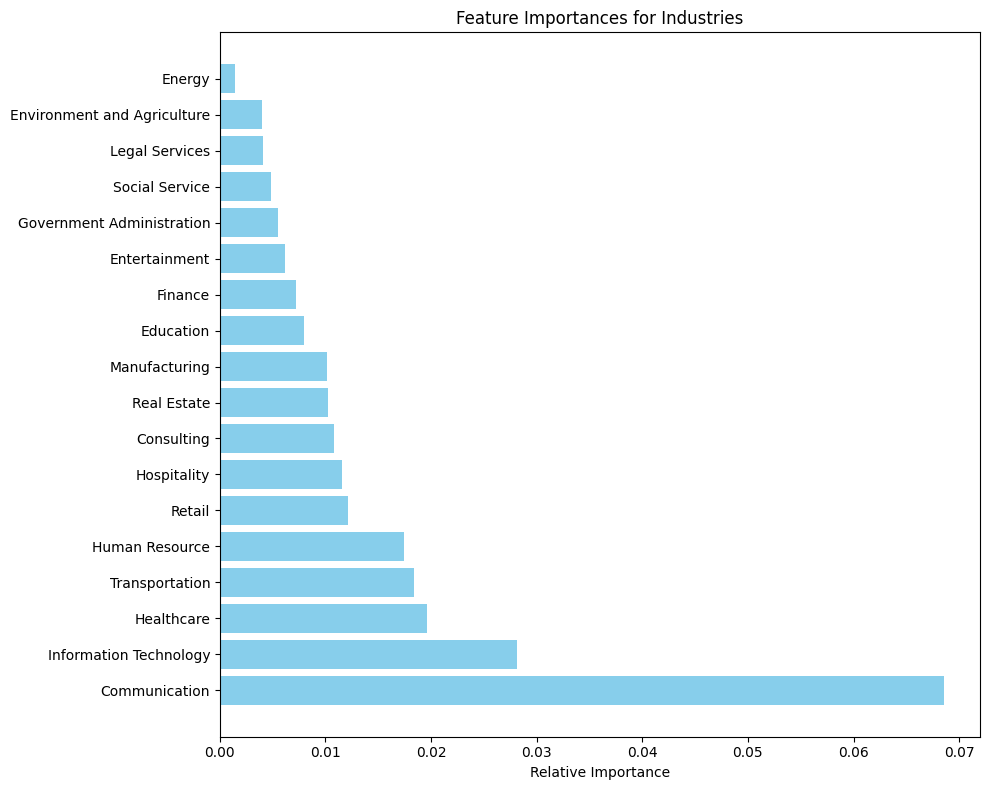

In [44]:
importances = clf_balanced.feature_importances_

# Map feature names to their importances
feature_importance_dict = dict(zip(X.columns, importances))

# Filter out the importances for the industries
industry_importances = {feature: importance for feature, importance in feature_importance_dict.items() if feature in industries}

# Sort industries by their importance
sorted_industries = sorted(industry_importances.items(), key=lambda item: item[1], reverse=True)

# Unzip the feature names and their corresponding importances
sorted_feature_names, sorted_importances = zip(*sorted_industries)

# Plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances for Industries')
plt.barh(range(len(sorted_importances)), sorted_importances, color='skyblue', align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [63]:
logistic_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=42, max_iter=10000)

logistic_l1.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_balanced = logistic_l1.predict(X_test_balanced)

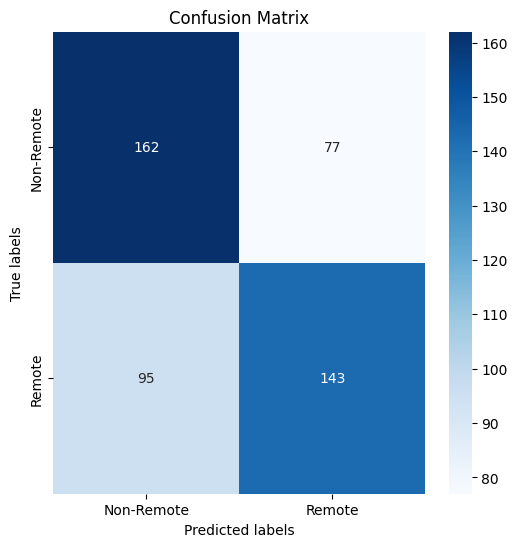

In [57]:
conf_matrix = confusion_matrix(y_test_balanced, y_pred_balanced)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Remote', 'Remote'])
ax.yaxis.set_ticklabels(['Non-Remote', 'Remote'])

plt.show()

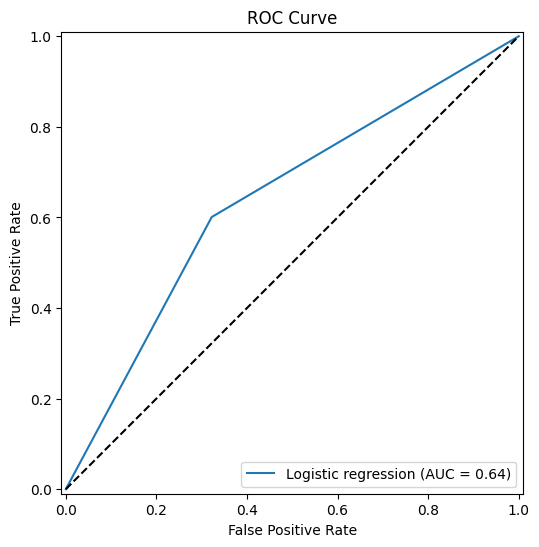

In [58]:
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_balanced)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression').plot(ax=ax)
ax.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

In [59]:
coefficients = logistic_l1.coef_[0]

feature_importance = pd.Series(coefficients, index=X_train_balanced.columns)
non_zero_features = feature_importance[feature_importance != 0].sort_values(key=abs, ascending=False)

In [60]:
non_zero_features[:20]

netezza      -4.662902
kanban        4.071813
intrusion     4.061418
bamboo        3.479686
dns           3.326352
versioning    3.251030
nsx          -3.059322
proxies      -2.890486
snowflake    -2.817095
unix          2.807459
openstack    -2.679721
solr         -2.524149
uipath       -2.451476
State_DE     -2.377216
voip          2.368450
rdbms        -2.342744
semantic     -2.292367
routing       2.192891
css3         -2.133756
vue           2.098649
dtype: float64

In [61]:
coef_series = pd.Series(coefficients, index=X_train_balanced.columns)

industry_coefs = {industry: coef_series[industry] for industry in industries if industry in coef_series and coef_series[industry] != 0}

industry_coefs_series = pd.Series(industry_coefs)
sorted_industry_coefs = industry_coefs_series.sort_values(ascending=False)

for industry in sorted_industry_coefs.index:
    print(f"{industry}: {industry_coefs_series[industry]}")

Energy: 0.9054523234741695
Information Technology: 0.7093952416451267
Communication: 0.5385504738649924
Education: 0.41997969708592453
Finance: 0.3802900673522219
Entertainment: 0.26723459356053286
Consulting: 0.21528848860171768
Transportation: 0.07415318925687545
Legal Services: 0.006319350509548313
Manufacturing: -0.05020412757992203
Government Administration: -0.07019194974401752
Environment and Agriculture: -0.08400266472120378
Healthcare: -0.11892984104622725
Hospitality: -0.13593545541167434
Retail: -0.18449691721449055
Human Resource: -0.33186818523844375
Social Service: -0.39121577327634605
Real Estate: -0.537392037266404


In [24]:
sizes = ['CitySize_big','CitySize_medium','CitySize_rural','CitySize_small']
for size in sizes:
    if size in coef_series:
        print(f"{size}: {coef_series[size]}")

CitySize_big: 0.0
CitySize_medium: -0.017287303092791743
CitySize_rural: 0.06178600722479771
CitySize_small: -0.37974798033152907


In [30]:
states = ['State_AK','State_AL','State_AR',	'State_AZ',	'State_CA',	'State_CO',	'State_CT',	'State_DC',	'State_DE',	'State_FL',	'State_GA',	'State_HI','State_IA',	'State_ID',	'State_IL',	'State_IN','State_KS','State_KY','State_LA','State_MA',	'State_MD',	'State_ME',	'State_MI',	'State_MN',	'State_MO','State_MS',	'State_MT',	'State_NC',	'State_ND'	,'State_NE','State_NH',	'State_NJ',	'State_NM',	'State_NV',	'State_NY',	'State_OH',	'State_OK',	'State_OR', 'State_PA',	'State_RI',	'State_SC',	'State_SD',	'State_TN',	'State_TX',	'State_UT',	'State_VA',	'State_VT',	'State_WA',	'State_WI',	'State_WV',	'State_WY']

In [29]:
state_coefs = {state: coef_series[state] for state in states if state in coef_series and coef_series[state] != 0}

# Convert to a Series for easy manipulation
state_coefs_series = pd.Series(state_coefs)
sorted_state_coefs = state_coefs_series.sort_values(ascending=False)

# Now, print the sorted state coefficients by their actual value (not absolute) from the sorted index
for state in sorted_state_coefs.index:
    print(f"{state}: {state_coefs_series[state]}")

State_ME: 1.8941136167581702
State_DC: 0.5197334054616082
State_AZ: 0.45950689318613797
State_TN: 0.38001102600480585
State_NC: 0.21671177595684968
State_OH: 0.1988301873676974
State_OR: 0.1917025539587961
State_MA: 0.138638422655838
State_CA: 0.12177238066699478
State_TX: 0.11897925715755739
State_CO: 0.05307608771232113
State_UT: -0.026061585035960483
State_FL: -0.05488159412159994
State_OK: -0.1590853835933868
State_NY: -0.3135483762136667
State_MO: -0.4016370349731752
State_KY: -0.446368449350725
State_NV: -0.47290649429224757
State_WI: -0.5440122614439705
State_IN: -0.6781944747680166
State_VA: -0.7349235862620936
State_MD: -1.0754941670064482
State_NE: -1.222026296782269
State_DE: -2.377216387871376


In [32]:
logistic_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=42, max_iter=10000)

# Fit the model on the balanced training data
logistic_l1.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_balanced = logistic_l1.predict(X_test_balanced)

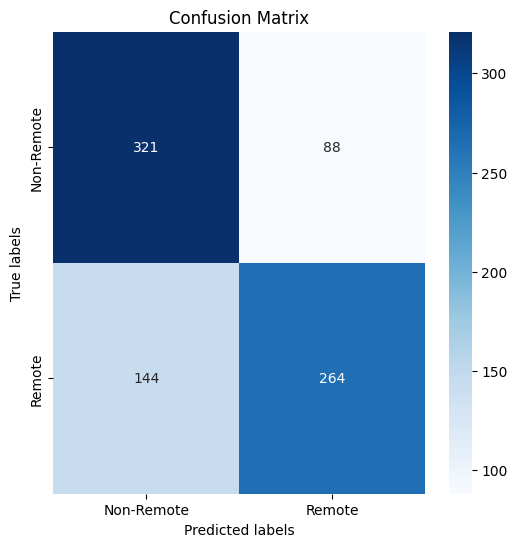

In [64]:
conf_matrix = confusion_matrix(y_test_balanced, y_pred_balanced)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Non-Remote', 'Remote'])
ax.yaxis.set_ticklabels(['Non-Remote', 'Remote'])

plt.show()

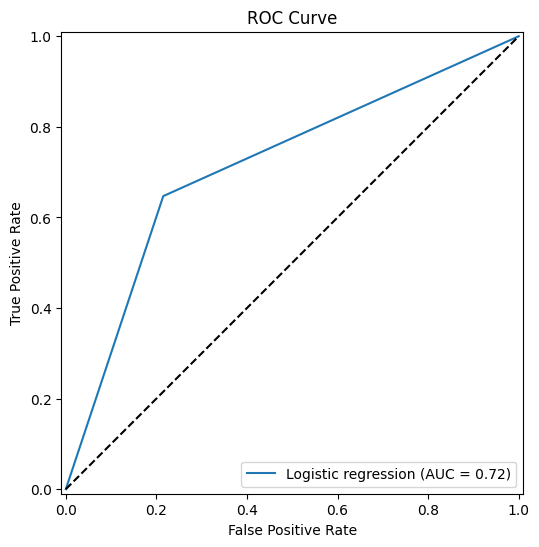

In [65]:
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_balanced)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression').plot(ax=ax)
ax.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

In [66]:
coefficients = logistic_l1.coef_[0]
feature_importance = pd.Series(coefficients, index=X_train_balanced.columns)
non_zero_features = feature_importance[feature_importance != 0].sort_values(key=abs, ascending=False)
non_zero_features[:20]

android            6.828488
vpn                5.445002
.net               4.321568
ethernet          -3.677632
ansible           -3.489454
ldap              -3.253634
State_DE           2.919670
purview            2.903529
State_AK           2.896476
hosting           -2.872894
cisco             -2.811107
ssis               2.804909
graphql            2.725947
jira               2.644437
Cloud Computing    2.566260
datastage         -2.486218
query             -2.482344
j2ee              -2.402796
itil               2.369369
jenkins            2.342195
dtype: float64

In [68]:
coef_series = pd.Series(coefficients, index=X_train_balanced.columns)
industry_coefs = {industry: coef_series[industry] for industry in industries if industry in coef_series and coef_series[industry] != 0}

industry_coefs_series = pd.Series(industry_coefs)
sorted_industry_coefs = industry_coefs_series.sort_values(ascending=False)

for industry in sorted_industry_coefs.index:
    print(f"{industry}: {industry_coefs_series[industry]}")

Communication: 1.8415060554307165
Entertainment: 0.6988577817058923
Legal Services: 0.5179814655922019
Finance: 0.5164351992837285
Human Resource: 0.40736507491398755
Information Technology: 0.2559185229021624
Manufacturing: 0.2255607296502959
Energy: 0.054020076401036544
Environment and Agriculture: -0.154619424301648
Government Administration: -0.25644022187465326
Social Service: -0.31394535245378263
Hospitality: -0.36828604130484544
Education: -0.4336211548399599
Healthcare: -0.513537245634477
Transportation: -0.6051211115956613
Retail: -0.6878149779867297
Real Estate: -0.8141428331737491
Consulting: -1.2870012401625281


In [69]:
state_coefs = {state: coef_series[state] for state in states if state in coef_series and coef_series[state] != 0}

# Convert to a Series for easy manipulation
state_coefs_series = pd.Series(state_coefs)
sorted_state_coefs = state_coefs_series.sort_values(ascending=False)

# Now, print the sorted state coefficients by their actual value (not absolute) from the sorted index
for state in sorted_state_coefs.index:
    print(f"{state}: {state_coefs_series[state]}")

State_DE: 2.9196700300071283
State_AK: 2.8964757096551024
State_DC: 1.4344633211981457
State_CO: 0.9406292361274361
State_VA: 0.7917035898649066
State_UT: 0.7418993999499641
State_ID: 0.7021459005647013
State_NJ: 0.5033192304293492
State_AZ: 0.32238887450255266
State_IN: 0.281006839358148
State_NV: 0.2748934689063748
State_NY: 0.2119512151574416
State_WA: 0.16148777178068024
State_TX: 0.15160552463476834
State_GA: 0.12408516202001672
State_MD: 0.0792431395681735
State_FL: 0.05336013697020273
State_CA: -0.040167800625675175
State_KY: -0.10133025699723086
State_IL: -0.11239352944544634
State_LA: -0.15361666928437182
State_ME: -0.1869024841830149
State_MO: -0.21545014833876083
State_OR: -0.24674933505509394
State_MN: -0.2733927294102504
State_MA: -0.2847180570703561
State_TN: -0.3304117393838067
State_NH: -0.36707441543035524
State_HI: -0.3829716673542171
State_CT: -0.5421891682014449
State_IA: -0.6888142749937405
State_AL: -0.7103282272483832
State_RI: -0.7405604075368587
State_OH: -0.74

Interpretation:

Pre-pandemic:
Random Forest had an accuracy of 67.69%, precision of 67.84%, recall of 64.71%, F1-score of 66.24%, and an AUC of 0.67.
Logistic Regression had lower scores across all metrics compared to Random Forest with an accuracy of 63.94%, precision of 65.00%, recall of 60.08%, F1-score of 62.54%, and an AUC of 0.64.
Post-pandemic:
Random Forest performance improved significantly post-pandemic with an accuracy of 78.46%, precision of 80.53%, recall of 75.00%, F1-score of 77.66%, and an AUC of 0.78.
Logistic Regression also improved post-pandemic, with an accuracy of 72.09%, precision of 75.57%, recall of 65.20%, F1-score of 70.00%, and an AUC of 0.72.

For both time periods, Random Forest outperforms Logistic Regression on all metrics.
The post-pandemic performance of both models is better than the pre-pandemic performance, which could be due to several factors like more data, better feature selection, or changes in the underlying patterns of the data due to the pandemic.
The AUC has increased for both models, indicating that the ability of the models to distinguish between the positive and negative classes has improved post-pandemic.
F1-score, which is the harmonic mean of precision and recall, has also seen an increase post-pandemic for both models, suggesting a better balance between precision and recall.
